In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import tensorflow_datasets as tfds
imdb,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

Shuffling and writing examples to C:\Users\786\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteBS7W0Q\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\786\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteBS7W0Q\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\786\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteBS7W0Q\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\786\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [10]:
test_data,train_data=imdb['test'],imdb['train']

In [11]:
tokenizer=info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [13]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 35ms/step - loss: 0.6812 - accuracy: 0.5848 - val_loss: 0.6517 - val_accuracy: 0.5674
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 0.5454 - accuracy: 0.7864 - val_loss: 0.4363 - val_accuracy: 0.8431
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3532 - accuracy: 0.8746 - val_loss: 0.3543 - val_accuracy: 0.8555
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2837 - accuracy: 0.8977 - val_loss: 0.3239 - val_accuracy: 0.8758
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 0.2466 - accuracy: 0.9124 - val_loss: 0.3100 - val_accuracy: 0.8802
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2191 - accuracy: 0.9215 - val_loss: 0.3072 - val_accuracy: 0.8787
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2026 - accuracy: 0.9271 - val_loss: 0.3086 - val_accuracy:

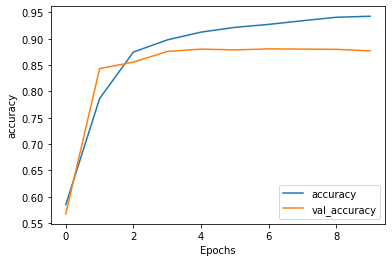

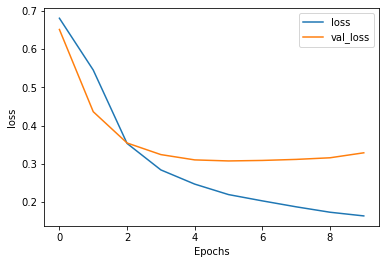

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")